In [1]:
%matplotlib widget
import sys
import numpy as np
import matplotlib.pyplot as plt
%reload_ext autoreload

sys.path.append('../')
sys.path.append('../src')

%aimport src.source
%aimport src.plots

from src.source import Simu
from src.plots import plot_max_abs, plot_profiles, SimuData

In [2]:
%autoreload 1
simu = Simu(    'test4',
                B0=1.4,
                R0=1.0,
                a0=0.25,
                harmonic=2,
                theta_in=np.pi/2,
                omega_b=7.8 * 10**10 * 2 * np.pi,
                W0=0.02,
                Power_in=1,
                vmax=4,
                Nv=100,
                Nr=200,
                Ne0=2.0e19,
                Te0=2.0e3 * 1.602e-19
                )


In [4]:
simu.compute()

iR 101
iR 100
iR 99
iR 97
iR 95
iR 94
iR 93
iR 92
iR 91
iR 90
iR 89


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
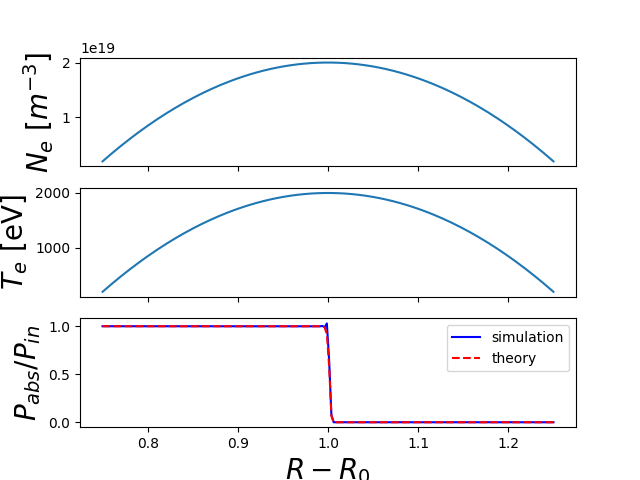

In [10]:
%autoreload 1
plot_profiles('test4')

/home/sascha/Documents/M2PPF/regroupement/hands-on/numerical_models/notebooks/../src/plots.py:120: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = plt.pcolor(Vpar, Vperp, np.transpose(Dn[iR_max,:,:]))


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
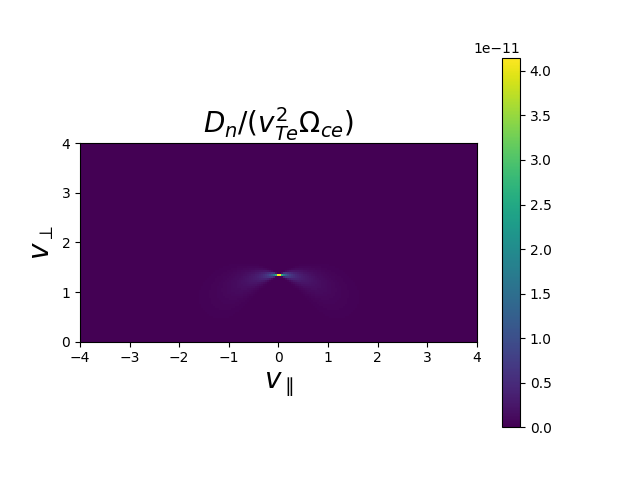

In [8]:
%autoreload 1
plot_max_abs('test4')

### Study the impact of the Beam frequency

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
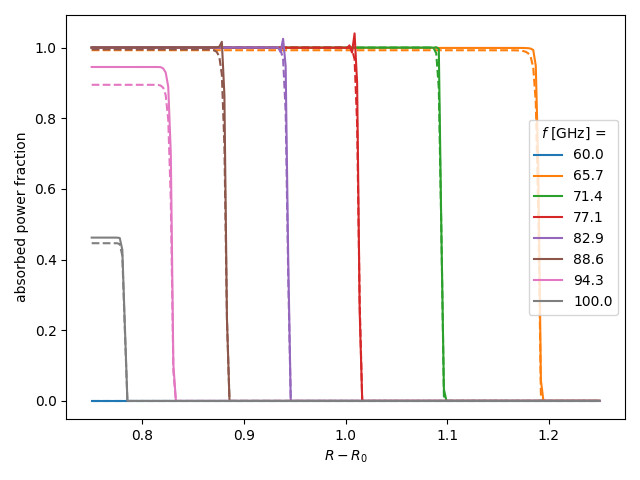

In [3]:
%autoreload 1

# frequency scan
Omega_b = np.linspace(6, 10, 8) * 1e10 * 2 * np.pi
N_simu = len(Omega_b)
Names = ['freq_{}'.format(i) for i in range(len(Omega_b))]

fig, ax = plt.subplots()

for i in range(N_simu):
    
    simu_name = Names[i]
    simu = SimuData(simu_name)
    f = Omega_b[i] * 1e-9 / 2 / np.pi # frequency in GHz
    f_label = '{:.1f}'.format(f) 
    
    vec_R  = simu.vec_R
    vec_Ne = simu.vec_Ne
    vec_Te = simu.vec_Te
    vec_Power = simu.vec_Power
    vec_Albajar = simu.vec_Albajar
    
    l, = ax.plot(vec_R, (vec_Power[-1] - vec_Power)/vec_Power[-1], '-', label=f_label)
    ax.plot(vec_R, (vec_Albajar[-1] - vec_Albajar)/vec_Albajar[-1], '--', color=l.get_color())
    ax.set_xlabel("$R - R_0$")
    ax.set_ylabel("absorbed power fraction")
    #ax.legend(["simulation","theory"])
    ax.legend(title='$f$ [GHz] =')
    
    #ax.text()
    plt.tight_layout()


In [4]:
%aimport src.mpi_job
from src.mpi_job import frequency_scan, density_scan
simus = density_scan()

['Ne0_0.10e19', 'Ne0_0.37e19', 'Ne0_0.64e19', 'Ne0_0.91e19', 'Ne0_1.19e19', 'Ne0_1.46e19', 'Ne0_1.73e19', 'Ne0_2.00e19']


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
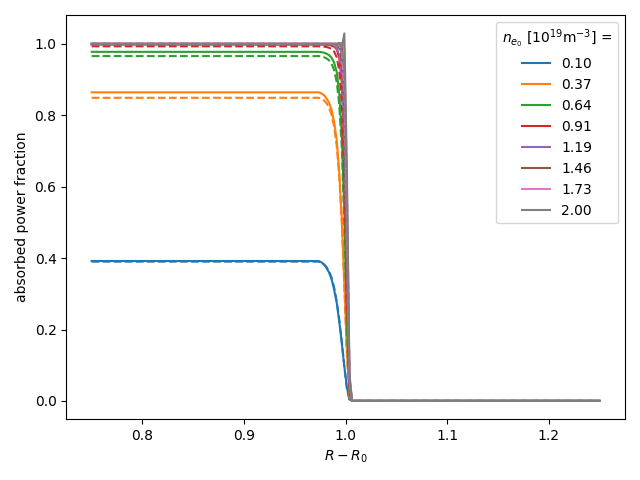

In [5]:
fig, ax = plt.subplots()

for i in range(len(simus)):
    
    simu_name = simus[i].name
    simu = SimuData(simu_name)
    n = simus[i].Ne0
    n_label = '{:.2f}'.format(n * 1e-19) 
    
    vec_R  = simu.vec_R
    vec_Ne = simu.vec_Ne
    vec_Te = simu.vec_Te
    vec_Power = simu.vec_Power
    vec_Albajar = simu.vec_Albajar
    
    l, = ax.plot(vec_R, (vec_Power[-1] - vec_Power)/vec_Power[-1], '-', label=n_label)
    ax.plot(vec_R, (vec_Albajar[-1] - vec_Albajar)/vec_Albajar[-1], '--', color=l.get_color())
    ax.set_xlabel("$R - R_0$")
    ax.set_ylabel("absorbed power fraction")
    #ax.legend(["simulation","theory"])
    ax.legend(title='$n_{e_0}$ [$10^{19}\mathrm{m}^{-3}$] =')
    
    #ax.text()
    plt.tight_layout()